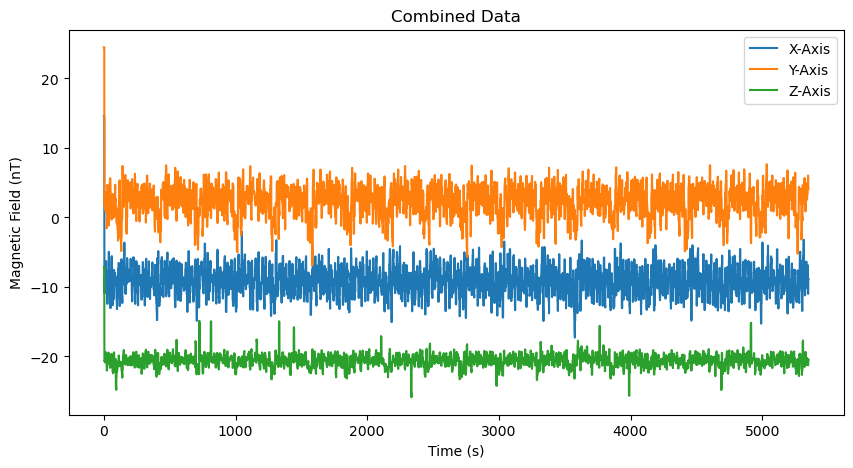

C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning: Q-factor too high for frequencies 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
  warn("Q-factor too high for frequencies %s"%",".join("%.2f"%fi for fi in f[q >= qneeded]))


[[ 1.  +0.j    0.61+0.j    0.98+0.j    0.08+0.j    0.05+0.j  ]
 [ 1.  +0.j   -0.45-0.09j  0.07+0.09j  0.71+0.67j  0.09+0.09j]
 [ 1.  +0.j    0.64+0.04j  0.  +0.03j -0.05+0.05j  0.78+0.6j ]
 [ 1.  +0.j   -0.11-0.09j  0.14+0.04j  0.01+0.2j   0.02+0.07j]]


100%|████████████████████████████████████████████████████████████████████████████████████| 5703/5703 [00:19<00:00, 296.62it/s]
C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning: Q-factor too high for frequencies 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
  warn("Q-factor too high for frequencies %s"%",".join("%.2f"%fi for fi in f[q >= qneeded]))


[[ 1.  +0.j    0.33+0.j    0.11+0.j  ]
 [ 1.  +0.j    0.72+0.17j -0.2 +0.92j]
 [ 1.  +0.j    0.25+0.04j -0.02+0.06j]
 [ 1.  +0.j    0.53+0.07j  0.04+0.31j]]


100%|████████████████████████████████████████████████████████████████████████████████████| 5703/5703 [00:20<00:00, 280.16it/s]
C:\Users\ASUS\anaconda3\envs\my_env\lib\site-packages\nsgt\nsgfwin_sl.py:64: UserWarning: Q-factor too high for frequencies 0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
  warn("Q-factor too high for frequencies %s"%",".join("%.2f"%fi for fi in f[q >= qneeded]))


[[ 1.  +0.j    0.25+0.j    0.42+0.j    0.47+0.j  ]
 [ 1.  +0.j   -0.69+0.22j  0.49+0.23j  0.64+0.14j]
 [ 1.  +0.j    0.15+0.04j  0.22+0.08j -0.14+0.03j]
 [ 1.  +0.j    0.51+0.37j  0.64+0.28j  0.52+0.24j]]


100%|████████████████████████████████████████████████████████████████████████████████████| 5703/5703 [00:27<00:00, 205.87it/s]


B_ubss shape: (3, 5352)


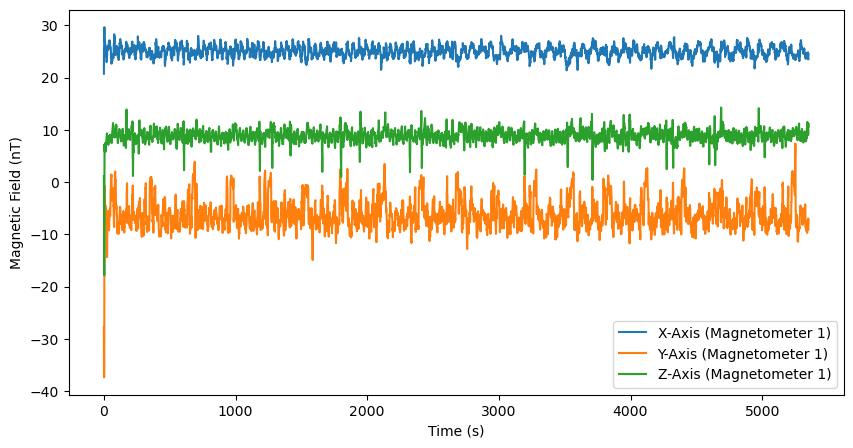

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r'C:\Users\ASUS\Desktop\ubss\MAGPRIME')
from magprime.algorithms import UBSS

# Function to load data from the .dat file
def load_data(file_path):
    try:
        data = np.loadtxt(file_path, usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))
    except Exception as e:
        print(f"Error loading data: {e}")
        data = np.array([])  # Return an empty array in case of an error
    return data

# Path to the data file
file_path = r"C:\Users\ASUS\Desktop\ubss\twomagnetictorq_10min_data1.txt"

# Load data
B = load_data(file_path)
if B.size == 0:
    raise ValueError("Failed to load data or data is empty")

Ba = B.T  # Transpose to separate columns

# Separate into individual arrays for each magnetometer's X, Y, Z components
B_X1, B_Y1, B_Z1 = Ba[0], Ba[1], Ba[2]
B_X2, B_Y2, B_Z2 = Ba[3], Ba[4], Ba[5]
B_X3, B_Y3, B_Z3 = Ba[6], Ba[7], Ba[8]
B_X4, B_Y4, B_Z4 = Ba[9], Ba[10], Ba[11]

# Stack the data into 2D arrays for each magnetometer (3 x n for each)
B1 = np.vstack((B_X1, B_Y1, B_Z1))
B2 = np.vstack((B_X2, B_Y2, B_Z2))
B3 = np.vstack((B_X3, B_Y3, B_Z3))
B4 = np.vstack((B_X4, B_Y4, B_Z4))

# Stack all magnetometer data into a 3D array: (magnetometers, axes, data points)
B_ma = np.stack((B1, B2, B3, B4), axis=0)

# Decimate the data to 0.1 Hz
B_qzs = B_ma[:, :, ::5]

"Plot the data"
plt.figure(figsize=(10, 5))
plt.title("Combined Data")
plt.plot(B_ma[1,0]-B_ma[0,0], label="X-Axis")
plt.plot(B_ma[1,1]-B_ma[0,1], label="Y-Axis")
plt.plot(B_ma[1,2]-B_ma[0,2], label="Z-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (nT)")
plt.legend()
plt.show()

# Detrend the data (proper assignment)
UBSS.detrend = False

# Algorithm Parameters
UBSS.sigma = 10
UBSS.fs = 0.1
UBSS.cs_iters = 2
UBSS.bpo = 5

# Clean the data (use the 3D array)
B_ubss = UBSS.clean(np.copy(B_ma), triaxial=True)

# Check the shape of B_ubss to understand its structure
print(f"B_ubss shape: {B_ubss.shape}")

# Plot the data assuming B_ubss is a 2D array (magnetometer x time)
plt.figure(figsize=(10, 5))
plt.plot(B_ubss[0, :], label="X-Axis (Magnetometer 1)")
plt.plot(B_ubss[1, :], label="Y-Axis (Magnetometer 1)")
plt.plot(B_ubss[2, :], label="Z-Axis (Magnetometer 1)")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (nT)")
plt.legend()
plt.show()

